In [37]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


* ID: Unique calling number for each entry in the dataset.

* Birth_Year: The customer's birth year.

* Marital_Status: The customer's marital status.

* Revenue: Customer's annual revenue.

* Kidhome: Number of children under 12 years of age in the customer's household.

* Teenhome: Number of teenagers aged 12-18 in the customer's household.

* Dt_Customer: The date the customer joined or became a customer.

* Recency: The number of days since the customer last interacted with the company.

* MntCoke: The amount of money a customer fired to buy a Coca-Cola drink.

* MntFruits: The amount of money that shoots customers to buy fruits.

* MntMeatProducts: The amount of money that kills customers to buy meat products.

* MntFishProducts: The amount of money a customer kills to buy fish products.

* MntSweetProducts: The amount of money that kills customers to buy sweet food products.

* MntGoldProds: The amount of money a customer kills to buy gold or jewelry products.

* NumDealsPurchases: Number of customer purchases with special offers or discounts.

* NumWebPurchases: The number of customer purchases through the company's website.

* NumCatalogPurchases: The number of customer purchases through the company catalog.

* NumStorePurchases: The number of customer purchases through the company's physical stores.

* NumWebVisitsMonth: The number of customer visits to the company's website in a month.

* AcceptedCmp3: Did the customer accept the campaign 3 promotional offer.

* AcceptedCmp4: Did the customer accept the campaign promotion offer 4.

* AcceptedCmp5: Did the customer accept the promotional offer of campaign 5.

* AcceptedCmp1: Did the customer accept the promotion offer of campaign 1.

* AcceptedCmp2: Whether the customer accepts campaign 2's promotional offer.

* Complain: Did the customer file a complaint.

* Z_CostContact: The cost the company incurs for each contact with a customer.

* Z_Revenue: The revenue a company generates from each contact with a customer.

* Feedback: whether customers are responding positively to company offers or campaigns.

## EDA

### Feature Engineering

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Performing feature engineering: conversion rates

In [40]:
df['Age'] = [2023] - df['Year_Birth']
df['Number_of_children']= df['Kidhome'] + df['Teenhome']
df['Total_Expenses'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Transactions'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Income_per_Transaction'] = df['Income'] / df['Total_Transactions']
df['Visit_Frequency'] = df['NumWebVisitsMonth'] + df['Recency']
df['conversion_rate'] = df['Response'] / df['Visit_Frequency']
df['Campaign_Interactions'] = df['AcceptedCmp3'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df[['Age', 'Number_of_children', 'Total_Expenses', 'Total_Transactions', 'Income_per_Transaction', 'Visit_Frequency', 'conversion_rate',
    'Campaign_Interactions']]

,Age,Number_of_children,Total_Expenses,Total_Transactions,Income_per_Transaction,Visit_Frequency,conversion_rate,Campaign_Interactions
0,66,0,1617000,25,2.325520e+06,65,0.015385,0
1,69,2,27000,6,7.724000e+06,43,0.000000,0
2,58,0,776000,21,3.410143e+06,30,0.000000,0
3,39,1,53000,8,3.330750e+06,32,0.000000,0
4,42,1,422000,19,3.068053e+06,99,0.000000,0
...,...,...,...,...,...,...,...,...
2235,56,1,1341000,18,3.401278e+06,51,0.000000,0
2236,77,3,444000,22,2.909727e+06,63,0.000000,1
2237,42,0,1241000,19,2.999000e+06,97,0.000000,1
2238,67,1,843000,23,3.010652e+06,11,0.000000,0


Counting and classifying 'age' into several groups

In [41]:
intervals = [0, 29, 39, 49,59, np.inf]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['Range_Age'] = pd.cut(df['Age'], bins=intervals, labels=labels, right=False)

# Displays data after adding a new column
df[['Age', 'Range_Age', 'conversion_rate', 'Campaign_Interactions']]


,Age,Range_Age,conversion_rate,Campaign_Interactions
0,66,60+,0.015385,0
1,69,60+,0.000000,0
2,58,50-59,0.000000,0
3,39,40-49,0.000000,0
4,42,40-49,0.000000,0
...,...,...,...,...
2235,56,50-59,0.000000,0
2236,77,60+,0.000000,1
2237,42,40-49,0.000000,1
2238,67,60+,0.000000,0


## Visualization

<Axes: xlabel='Range_Age', ylabel='conversion_rate'>

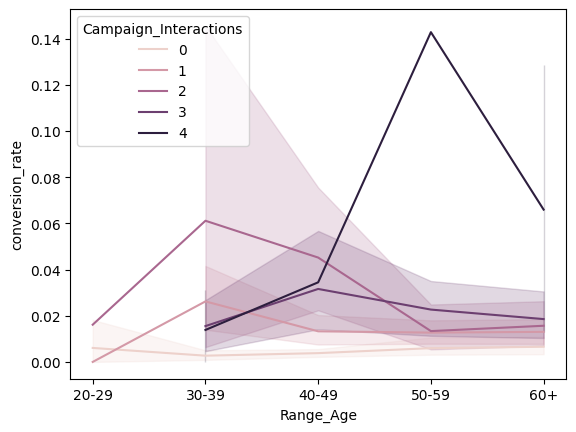

In [42]:
import seaborn as sns

# Plot the responses for different events and regions
sns.lineplot(x='Range_Age', y='conversion_rate',
             hue='Campaign_Interactions',
             data=df)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Unnamed: 0              2240 non-null   int64   
 1   ID                      2240 non-null   int64   
 2   Year_Birth              2240 non-null   int64   
 3   Education               2240 non-null   object  
 4   Marital_Status          2240 non-null   object  
 5   Income                  2216 non-null   float64 
 6   Kidhome                 2240 non-null   int64   
 7   Teenhome                2240 non-null   int64   
 8   Dt_Customer             2240 non-null   object  
 9   Recency                 2240 non-null   int64   
 10  MntCoke                 2240 non-null   int64   
 11  MntFruits               2240 non-null   int64   
 12  MntMeatProducts         2240 non-null   int64   
 13  MntFishProducts         2240 non-null   int64   
 14  MntSweetProducts        

In [44]:
Categorical = ['Education','Marital_Status', 'Income_per_Transaction', 'Range_Age' ]
Numericals = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Response', 'Age',
              'Number_of_children', 'Total_Expenses', 'Total_Transactions', 'Visit_Frequency', 'conversion_rate','Campaign_Interactions']
Mnt = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Num = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
campg = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


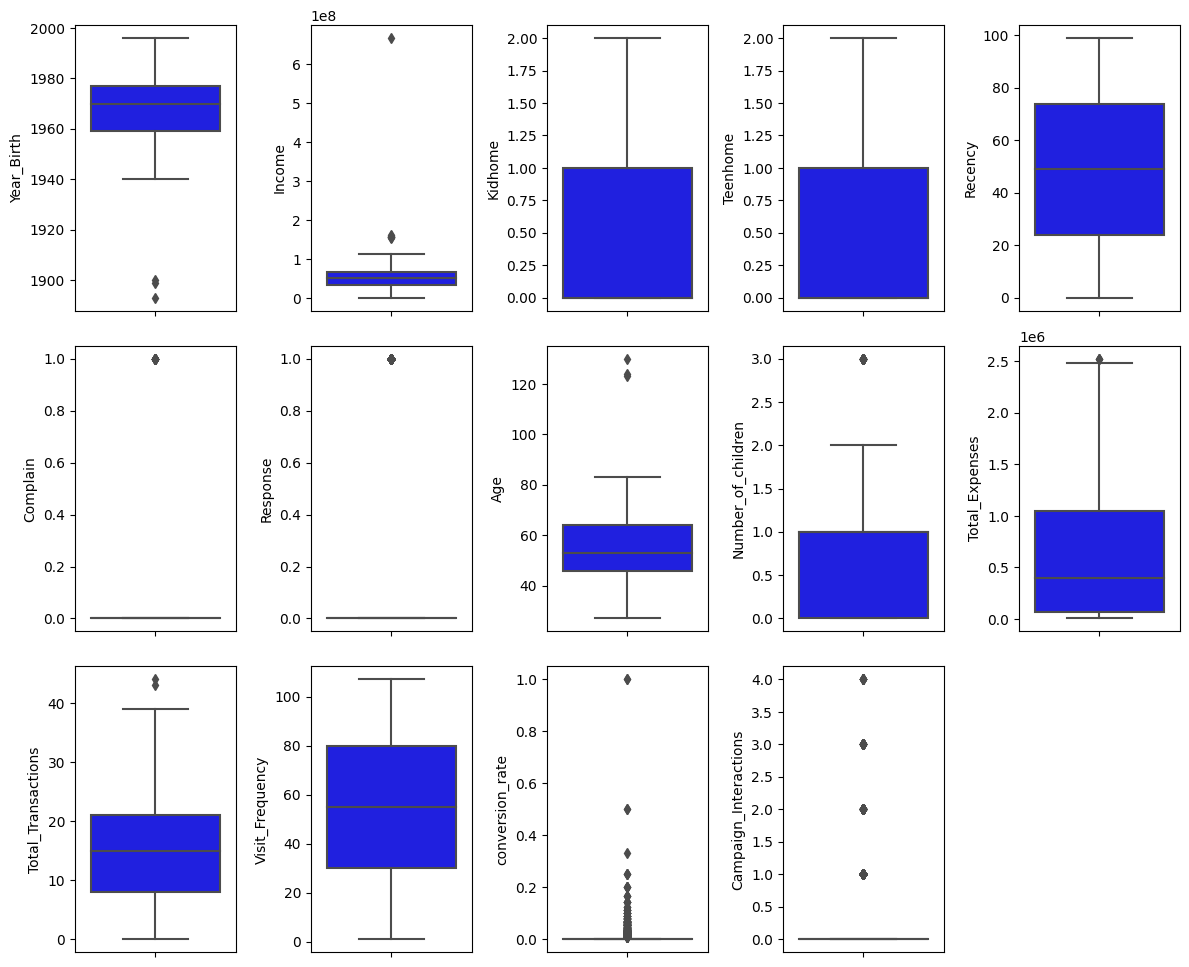

In [45]:

plt.figure(figsize=(12,45))
for i in range(0, len(Numericals)):
    plt.subplot(len(Numericals), 5,i+1)
    sns.boxplot(y=df[Numericals[i]], color='blue', orient='v')
    plt.tight_layout()

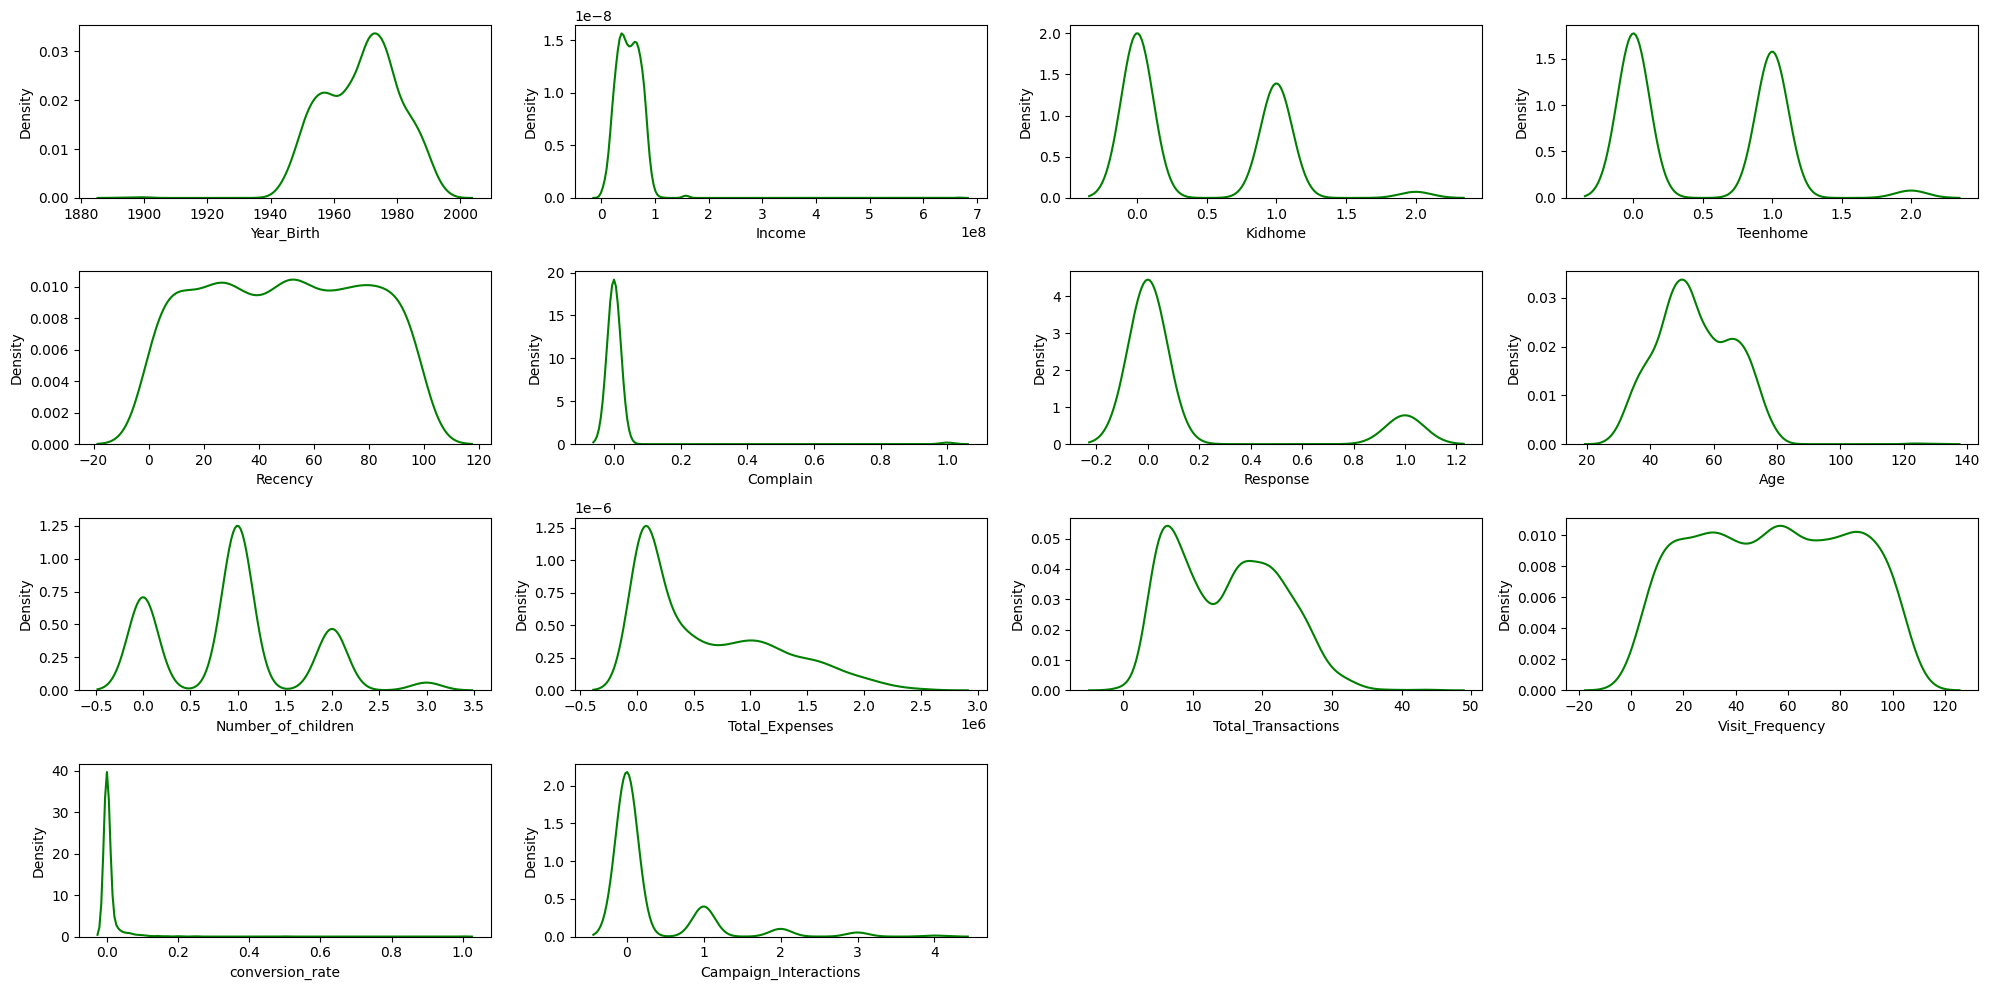

In [46]:
plt.figure(figsize=(20, 10))
for i in range(len(Numericals)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[Numericals[i]], color='green')
    plt.tight_layout()


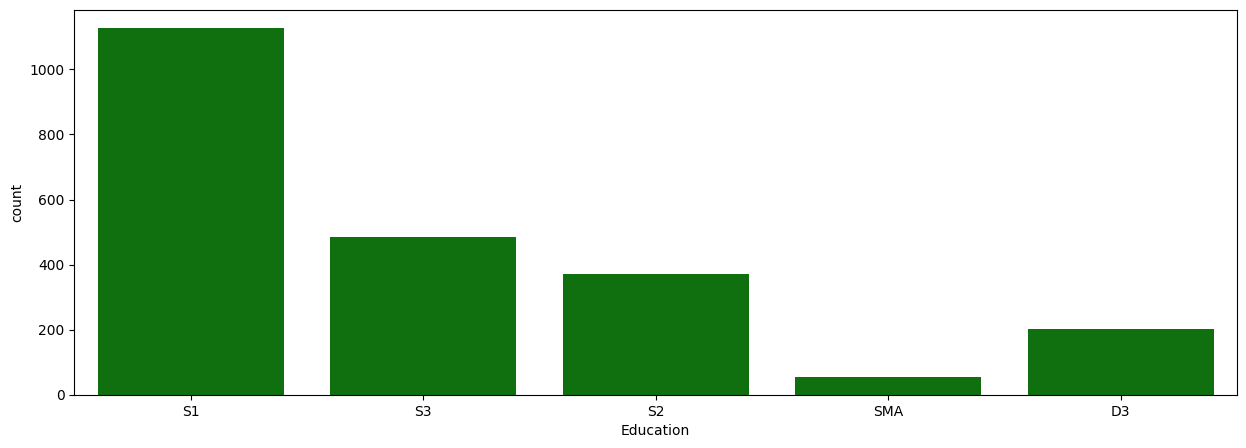

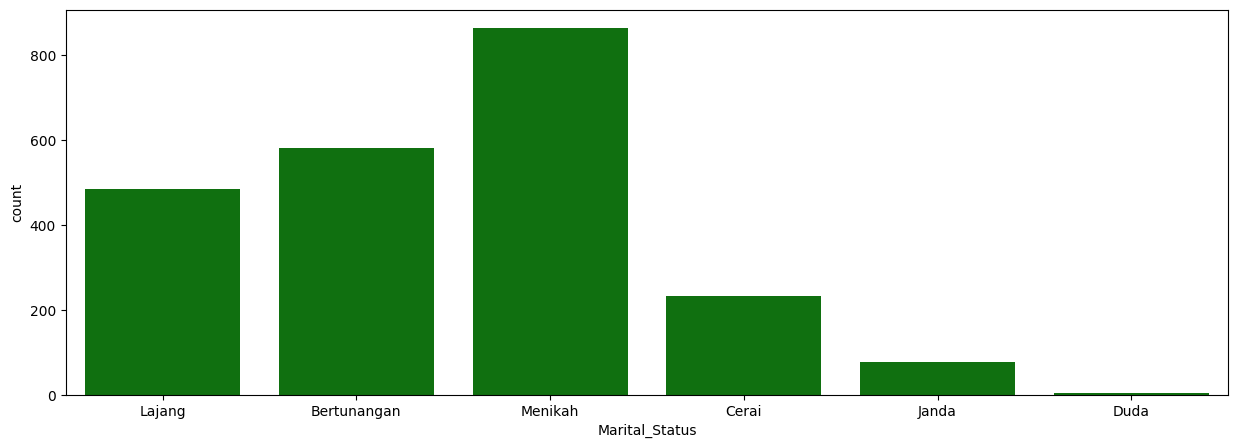

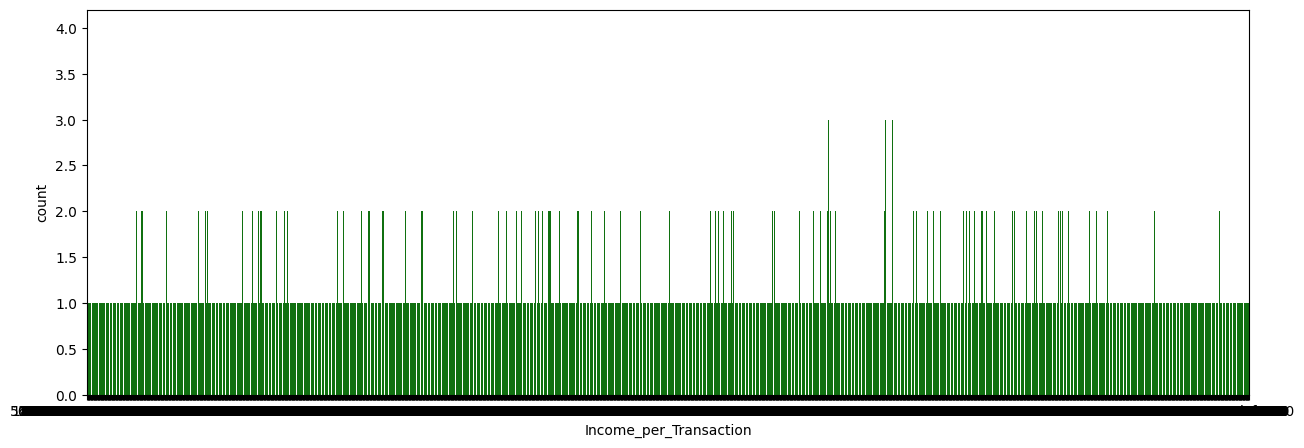

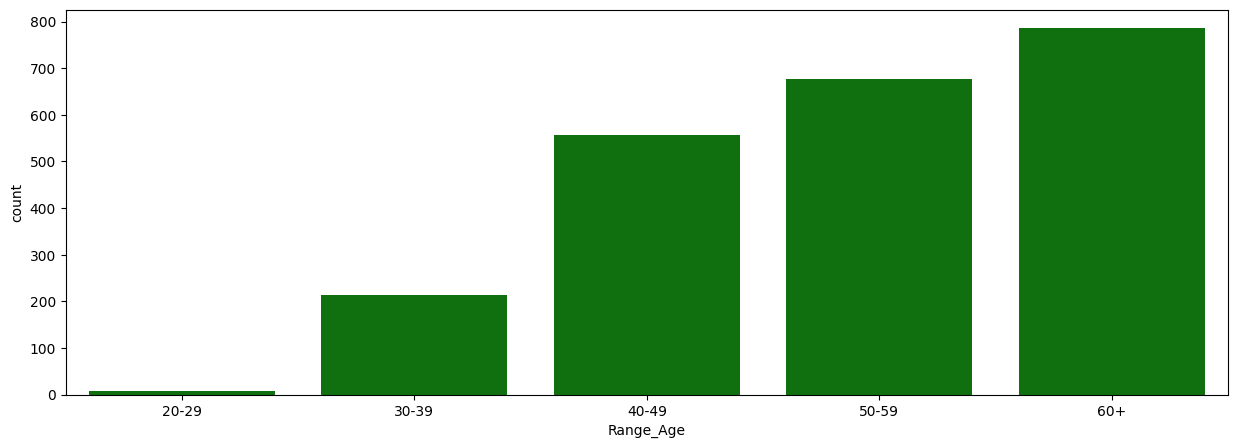

In [47]:
for i in range(len(Categorical)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[Categorical[i]], data=df, color='green')

<ipython-input-48-9eabd012fcf9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')


<Axes: >

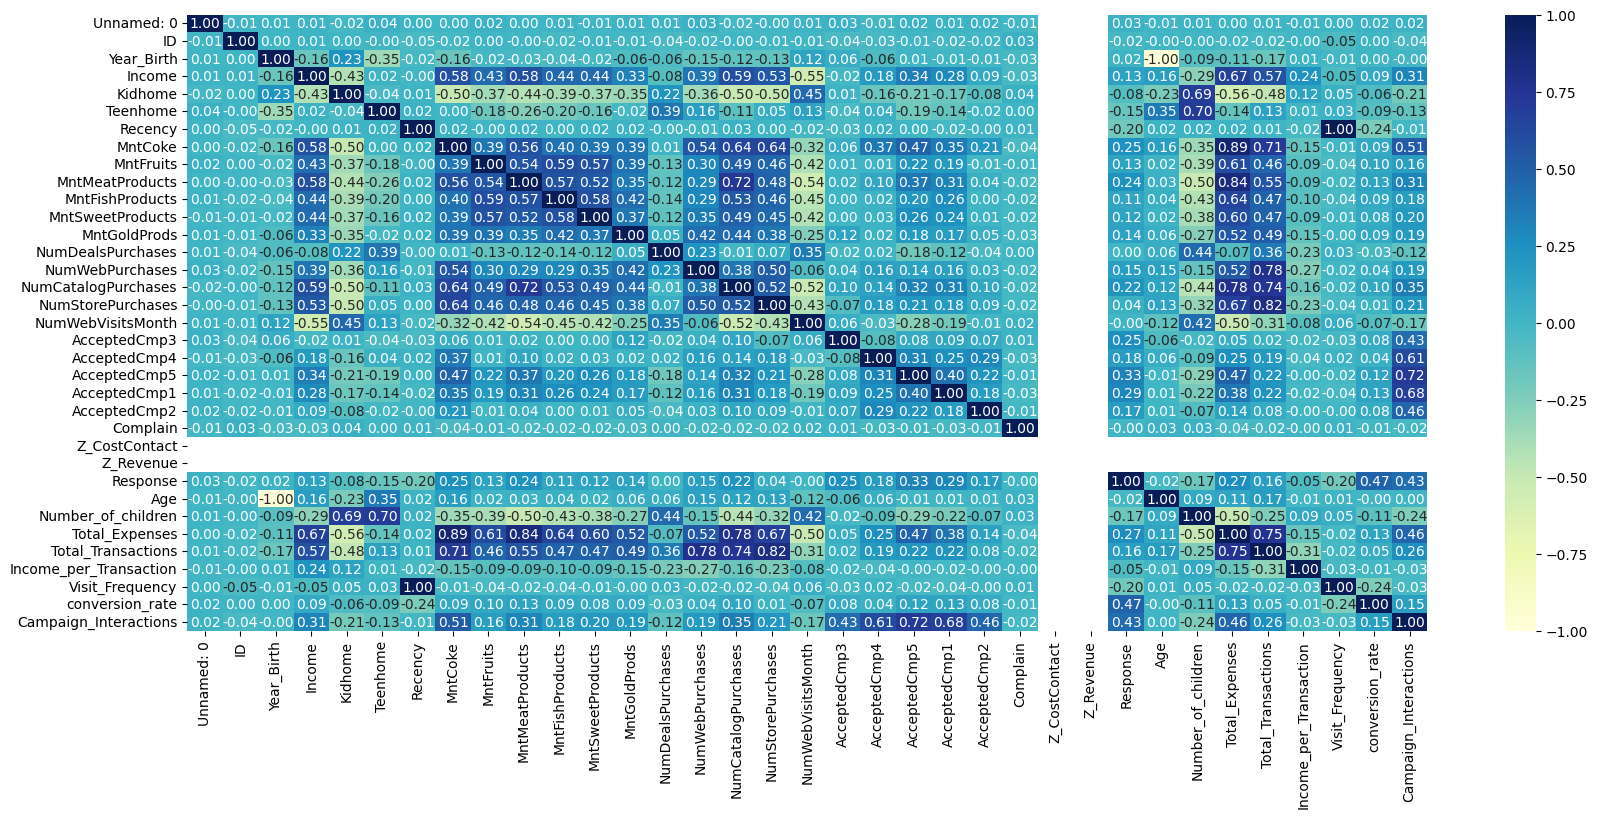

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

#### Handle null and duplicate data

In [49]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                    24
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Number_of_children         0
Total_Expenses             0
Total_Transactions         0
Income_per_Tra

In [50]:
# remove oulier based on IQR because the majority of the data is not normally distributed
print(f'Number of rows before filtering outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in Numericals:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers: 2240
Number of rows after filtering outliers: 1540


In [51]:
df['Income'] = df['Income'].fillna(0).astype(int)
df['Income_per_Transaction'] = df['Income_per_Transaction'].fillna(0).astype(str)

df.isnull().sum()

<ipython-input-51-16a76cebd790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Income'].fillna(0).astype(int)
<ipython-input-51-16a76cebd790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_per_Transaction'] = df['Income_per_Transaction'].fillna(0).astype(str)


Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Number_of_children        0
Total_Expenses            0
Total_Transactions        0
Income_per_Transaction    0
Visit_Frequency     

In [52]:
# check for duplicates of all columns

df.duplicated().sum()

0

Delete unnecessary data

In [53]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 1 to 2238
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Unnamed: 0              1540 non-null   int64   
 1   ID                      1540 non-null   int64   
 2   Year_Birth              1540 non-null   int64   
 3   Education               1540 non-null   object  
 4   Marital_Status          1540 non-null   object  
 5   Income                  1540 non-null   int64   
 6   Kidhome                 1540 non-null   int64   
 7   Teenhome                1540 non-null   int64   
 8   Dt_Customer             1540 non-null   object  
 9   Recency                 1540 non-null   int64   
 10  MntCoke                 1540 non-null   int64   
 11  MntFruits               1540 non-null   int64   
 12  MntMeatProducts         1540 non-null   int64   
 13  MntFishProducts         1540 non-null   int64   
 14  MntSweetProducts        

Melakukan feature encoding

In [54]:
# encoding of all categorical columns

Categorical = ['Education','Marital_Status', 'Dt_Customer','Income_per_Transaction', 'Range_Age']
df_enc = df.copy()
for i in Categorical[1:]:
    df_enc[i] = df_enc[i].astype('category').cat.codes

In [55]:
df_enc.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,Age,Number_of_children,Total_Expenses,Total_Transactions,Income_per_Transaction,Visit_Frequency,conversion_rate,Campaign_Interactions,Range_Age
1,1,2174,1954,S1,4,46344000,1,1,143,38,...,0,69,2,27000,6,1323,43,0.0,0,4
2,2,4141,1965,S1,0,71613000,0,0,407,26,...,0,58,0,776000,21,643,30,0.0,0,3
3,3,6182,1984,S1,0,26646000,1,0,181,26,...,0,39,1,53000,8,613,32,0.0,0,2
4,4,5324,1981,S3,5,58293000,1,0,358,94,...,0,42,1,422000,19,488,99,0.0,0,2
5,5,7446,1967,S2,0,62513000,0,1,173,16,...,0,56,1,716000,22,377,22,0.0,0,3


Standardization of features

In [56]:
# drop some features
df_new = df.drop(columns=['Unnamed: 0', 'Year_Birth', 'ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
                          'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                          'Number_of_children', 'Income_per_Transaction', 'Range_Age']).copy()
df_new

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Expenses,Total_Transactions,Visit_Frequency,conversion_rate,Campaign_Interactions
1,46344000,2,1,1,2,5,0,0,0,0,0,0,0,69,27000,6,43,0.0,0
2,71613000,1,8,2,10,4,0,0,0,0,0,0,0,58,776000,21,30,0.0,0
3,26646000,2,2,0,4,6,0,0,0,0,0,0,0,39,53000,8,32,0.0,0
4,58293000,5,5,3,6,5,0,0,0,0,0,0,0,42,422000,19,99,0.0,0
5,62513000,2,6,4,10,6,0,0,0,0,0,0,0,56,716000,22,22,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,44802000,2,9,4,12,8,0,0,0,0,0,0,0,53,1049000,27,79,0.0,0
2232,26816000,1,0,0,3,4,0,0,0,0,0,0,0,37,22000,4,54,0.0,0
2234,34421000,1,1,0,2,7,0,0,0,0,0,0,0,49,30000,4,88,0.0,0
2235,61223000,2,9,3,4,5,0,0,0,0,0,0,0,56,1341000,18,51,0.0,0


In [57]:
df_new.columns

Index(['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Total_Expenses', 'Total_Transactions',
       'Visit_Frequency', 'conversion_rate', 'Campaign_Interactions'],
      dtype='object')

In [58]:
# feature standardization first
feature = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Total_Expenses', 'Total_Transactions',
       'Visit_Frequency', 'conversion_rate', 'Campaign_Interactions']
X = df_new.values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = feature).head()
df_std.describe()

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Expenses,Total_Transactions,Visit_Frequency,conversion_rate,Campaign_Interactions
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,0.265750,0.044023,0.229599,-0.043961,0.253295,-0.092898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.077399,-0.139119,0.186590,-0.381559,0.0,0.0
std,0.903569,0.835902,1.062212,0.640973,1.117354,0.356234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.070808,0.715499,1.008646,1.082999,0.0,0.0
min,-1.111187,-0.727626,-1.023978,-0.854735,-1.120868,-0.603835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.277169,-0.890608,-1.035038,-1.192188,0.0,0.0
25%,-0.085196,-0.176448,-0.655279,-0.449348,-0.496248,-0.178054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.016349,-0.838056,-0.769467,-0.912661,0.0,0.0
50%,0.537180,-0.176448,0.450819,-0.043961,0.128372,-0.178054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200808,-0.092227,0.691175,-0.842779,0.0,0.0
75%,0.756983,-0.176448,0.819518,0.361426,1.377611,0.247727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.374688,0.502011,0.956746,-0.458429,0.0,0.0
max,1.230966,1.477085,1.556916,0.766813,1.377611,0.247727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.331026,0.623284,1.089531,1.498261,0.0,0.0


In [59]:
df_std

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Expenses,Total_Transactions,Visit_Frequency,conversion_rate,Campaign_Interactions
0,-0.085196,-0.176448,-1.023978,-0.449348,-1.120868,-0.178054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.331026,-0.890608,-1.035038,-0.458429,0.0,0.0
1,1.230966,-0.727626,1.556916,-0.043961,1.377611,-0.603835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.374688,0.623284,0.956746,-0.912661,0.0,0.0
2,-1.111187,-0.176448,-0.655279,-0.854735,-0.496248,0.247727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.277169,-0.838056,-0.769467,-0.842779,0.0,0.0
3,0.537180,1.477085,0.450819,0.361426,0.128372,-0.178054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.016349,-0.092227,0.691175,1.498261,0.0,0.0
4,0.756983,-0.176448,0.819518,0.766813,1.377611,0.247727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200808,0.502011,1.089531,-1.192188,0.0,0.0


In [60]:
# PCA
from sklearn.decomposition import PCA
pcs = PCA(n_components=4).fit_transform(X_std)
df_pca = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])
df_pca.describe()

,pc1,pc2,pc3,pc4
count,1.540000e+03,1.540000e+03,1.540000e+03,1.540000e+03
mean,-3.691131e-17,1.384174e-17,-1.384174e-17,-2.768348e-17
std,2.203696e+00,1.269470e+00,1.004789e+00,9.713268e-01
min,-4.746622e+00,-2.752040e+00,-2.710313e+00,-2.670663e+00
25%,-2.004436e+00,-8.196213e-01,-7.672999e-01,-6.827345e-01
50%,-4.591571e-01,-1.308171e-01,5.022904e-03,-4.173451e-02
75%,2.025492e+00,6.484397e-01,7.626997e-01,7.083584e-01
max,5.369159e+00,8.189400e+00,2.785629e+00,3.121191e+00


#### Seeing the exact number of clusters using the elbow method

In [61]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_pca.values)
    inertia.append(kmeans.inertia_)

<Axes: >

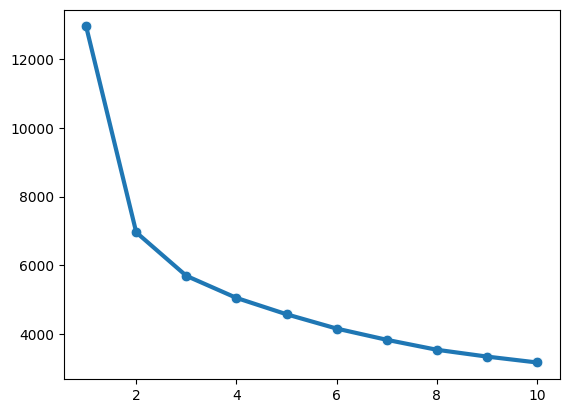

In [62]:
# visualization of the results of the elbow method
sns.lineplot(x=range(1,11), y=inertia, linewidth=3)
sns.scatterplot(x=range(1,11), y=inertia, s=60)

In [63]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    46.305675
1    18.212536
2    11.296794
3     9.448348
4     9.115348
5     7.880838
6     7.592623
7     5.611356
8     5.144042
9          NaN
dtype: float64

clustering implementation using k-means clustering

In [64]:
# fit model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_pca.values)
df_pca['labels_cluster'] = kmeans.labels_

In [65]:
df_pca

,pc1,pc2,pc3,pc4,labels_cluster
0,-1.575267,-0.856238,-1.101557,1.226219,0
1,2.345786,-0.335695,-0.872692,-0.345179,2
2,-2.064642,-0.169732,-0.286210,-1.336266,0
3,0.793721,1.326551,1.586488,-0.176212,1
4,2.046663,0.195838,-0.978939,-0.693897,2
...,...,...,...,...,...
1535,2.545396,1.657178,0.872786,-0.234933,1
1536,-2.533561,-1.290029,0.558868,-0.976856,0
1537,-2.593434,-0.415834,1.060508,0.445426,0
1538,1.863062,0.321759,-0.049834,-0.111269,1


The silhouette score calculation looks at how the model's performance is obtained

<Axes: xlabel='pc1', ylabel='pc2'>

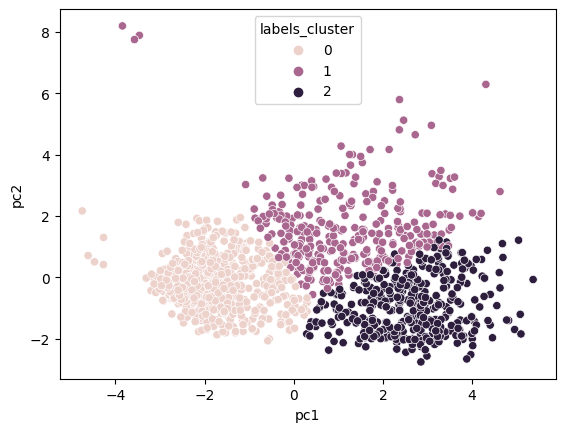

In [66]:
# visualization of clustering results
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='labels_cluster')

In [67]:
# calculate the silhouette score
X_sil = df_pca.drop(columns='labels_cluster').values
labels = df_pca['labels_cluster'].values
silhouette_avg = silhouette_score(X_sil, labels)
silhouette_avg

0.3520155461360974

<ipython-input-68-a4c5d70c1fe0>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)


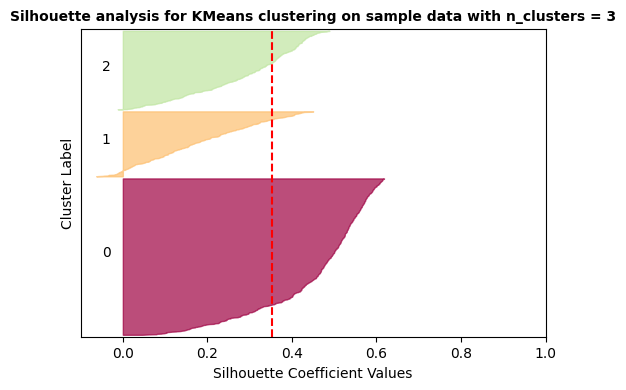

In [68]:
# silhouette score visualization
sample_silhouette_values = silhouette_samples(X_sil, labels)

n_clusters = 3
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(6, 4)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.set_yticks([])
plt.title(("Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % n_clusters),
              fontsize=10, fontweight='bold')
plt.show()

In [69]:
# restore data to original
for col in Categorical[1:]:
    codes = df_enc[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_enc[col] = df_enc[col].replace(mapping)

df_enc['labels_cluster'] = kmeans.labels_
df_enc.sample(5)



,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,Number_of_children,Total_Expenses,Total_Transactions,Income_per_Transaction,Visit_Frequency,conversion_rate,Campaign_Interactions,Range_Age,labels_cluster
1662,1662,6457,1976,S1,Cerai,64892000,0,1,29-05-2014,77,...,47,1,902000,24,2703833.3333333335,81,0.0,0,40-49,2
1120,1120,850,1968,S1,Lajang,70566000,0,1,06-10-2013,4,...,55,1,757000,22,3207545.4545454546,7,0.0,0,50-59,2
1863,1863,3254,1971,S1,Menikah,70886000,1,0,14-10-2013,65,...,52,1,960000,14,5063285.714285715,67,0.0,0,50-59,2
1466,1466,4690,1953,S1,Menikah,50725000,0,1,13-02-2013,45,...,70,1,586000,21,2415476.1904761903,53,0.0,0,60+,1
1754,1754,2154,1971,S1,Janda,30372000,1,1,25-12-2012,33,...,52,2,44000,8,3796500.0,40,0.0,0,50-59,0


In [70]:
# numeric column
df_nums = df_enc[Numericals]
df_nums['label'] = df_enc['labels_cluster']

df_nums.groupby('label').agg(['mean', 'median', 'std'])

<ipython-input-70-70973537faad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums['label'] = df_enc['labels_cluster']


Year_Birth                           Income                            \
              mean  median        std          mean      median           std   
label                                                                           
0      1971.601494  1973.0  11.112914  3.424239e+07  33996000.0  1.223773e+07   
1      1966.628743  1967.0   9.828249  5.338225e+07  54109500.0  1.186548e+07   
2      1966.965261  1968.0  12.587951  7.087441e+07  70596000.0  8.365000e+06   

        Kidhome                   Teenhome  ... Total_Transactions  \
           mean median       std      mean  ...                std   
label                                       ...                      
0      0.718555    1.0  0.484670  0.427148  ...           2.711178   
1      0.353293    0.0  0.484943  0.862275  ...           4.926827   
2      0.049628    0.0  0.228599  0.444169  ...           4.406822   

      Visit_Frequency                   conversion_rate              \
                 mean median        std            mean median  std   
label                                                                 
0           57.354919   57.0  28.704572             0.0    0.0  0.0   
1           57.368263   57.5  27.868616             0.0    0.0  0.0   
2           52.625310   56.0  28.880196             0.0    0.0  0.0   

      Campaign_Interactions              
                       mean median  std  
label                                    
0                       0.0    0.0  0.0  
1                       0.0    0.0  0.0  
2                       0.0    0.0  0.0  

[3 rows x 42 columns]

In [71]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 1 to 2238
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1540 non-null   int64  
 1   ID                      1540 non-null   int64  
 2   Year_Birth              1540 non-null   int64  
 3   Education               1540 non-null   object 
 4   Marital_Status          1540 non-null   object 
 5   Income                  1540 non-null   int64  
 6   Kidhome                 1540 non-null   int64  
 7   Teenhome                1540 non-null   int64  
 8   Dt_Customer             1540 non-null   object 
 9   Recency                 1540 non-null   int64  
 10  MntCoke                 1540 non-null   int64  
 11  MntFruits               1540 non-null   int64  
 12  MntMeatProducts         1540 non-null   int64  
 13  MntFishProducts         1540 non-null   int64  
 14  MntSweetProducts        1540 non-null   

Choose a cluster to do retargeting marketing

In [72]:
df_cats = df_enc[Categorical].drop(columns=['Income_per_Transaction', 'Dt_Customer'])
df_cats['label'] = df_enc['labels_cluster']

df_cats.groupby('label').agg(pd.Series.mode)


,Education,Marital_Status,Range_Age
label,,,
0,S1,Menikah,50-59
1,S1,Menikah,60+
2,S1,Menikah,60+


The interpretation of these results is as follows:

* Cluster 0 has the majority of customers with undergraduate education level, marital status Married, and age range 50-59.
* Cluster 1 has the majority of customers with an undergraduate education level, marital status is Married, and the age range is 60 and above.
* Cluster 2 also has the majority of customers with an undergraduate education level, marital status is Married, and the age range is 60 and over.